In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Clustering
- Unsupervised Machine Learning
- Discover things about unlabeled data
- Why?
    - Explore
    - Labeling
    - Features for supervised learning
    

In [2]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [3]:
train_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
41,-1.608304,-1.741994,-1.333104,-1.141286,setosa
142,-0.040855,-0.847906,0.796712,1.005974,virginica
82,-0.040855,-0.847906,0.124139,0.066547,versicolor
127,0.320864,-0.177340,0.684617,0.871770,virginica
28,-0.764293,0.716748,-1.277056,-1.275490,setosa
...,...,...,...,...,...
29,-1.367158,0.269704,-1.164960,-1.275490,setosa
52,1.285447,0.046182,0.684617,0.469159,versicolor
1,-1.126012,-0.177340,-1.277056,-1.275490,setosa
57,-1.126012,-1.518472,-0.212148,-0.201860,versicolor


**Clustering with 2 features and 4 clusters**

In [4]:
x = train_scaled[['sepal_length', 'sepal_width']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)

,sepal_length,sepal_width
0,-0.912906,0.883091
1,-0.557597,-1.662165
2,1.285447,0.130003
3,0.185219,-0.589459


In [6]:
kmeans.labels_

array([1, 3, 3, 3, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 3, 2, 2,
       3, 3, 0, 3, 3, 2, 1, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2,
       0, 3, 0, 0, 0, 2, 2, 3, 2, 3, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 3, 3,
       3, 3, 2, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 1, 0, 3, 2, 1, 0, 3, 3, 3,
       2, 3, 3, 2, 2, 2, 0, 2, 0, 1, 0], dtype=int32)

In [7]:
train['clusters'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,3
82,5.8,2.7,3.9,1.2,versicolor,3
127,6.1,3.0,4.9,1.8,virginica,3
28,5.2,3.4,1.4,0.2,setosa,0
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,0
52,6.9,3.1,4.9,1.5,versicolor,2
1,4.9,3.0,1.4,0.2,setosa,0
57,4.9,2.4,3.3,1.0,versicolor,1


In [9]:
train.groupby('clusters').mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,5.076744,3.474419,1.544186,0.286047
1,5.371429,2.335714,3.700000,1.135714
2,6.900000,3.137500,5.531250,1.915625
3,5.987500,2.815625,4.684375,1.553125


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

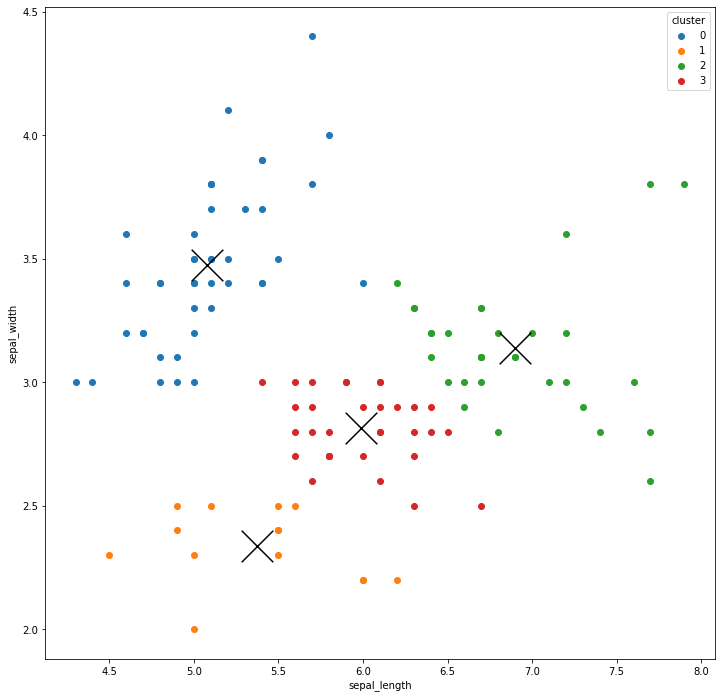

In [10]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.sepal_length, subset.sepal_width, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'sepal width', xlabel = 'sepal length')

train.groupby('clusters').mean().plot.scatter(y = 'sepal_width', x= 'sepal_length', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**Clustering with 3 features and 3 clusters**

In [11]:
x = train_scaled[['sepal_length', 'petal_length', 'sepal_width']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)


,sepal_length,petal_length,sepal_width
0,1.129585,0.973058,0.013472
1,-0.180466,0.315881,-0.994960
2,-0.939411,-1.235687,0.887051


In [12]:
train['clusters'] = kmeans.labels_
train.groupby('clusters').mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.770732,3.085366,5.414634,1.856098
1,5.684211,2.634211,4.242105,1.378947
2,5.054762,3.476190,1.473810,0.254762


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

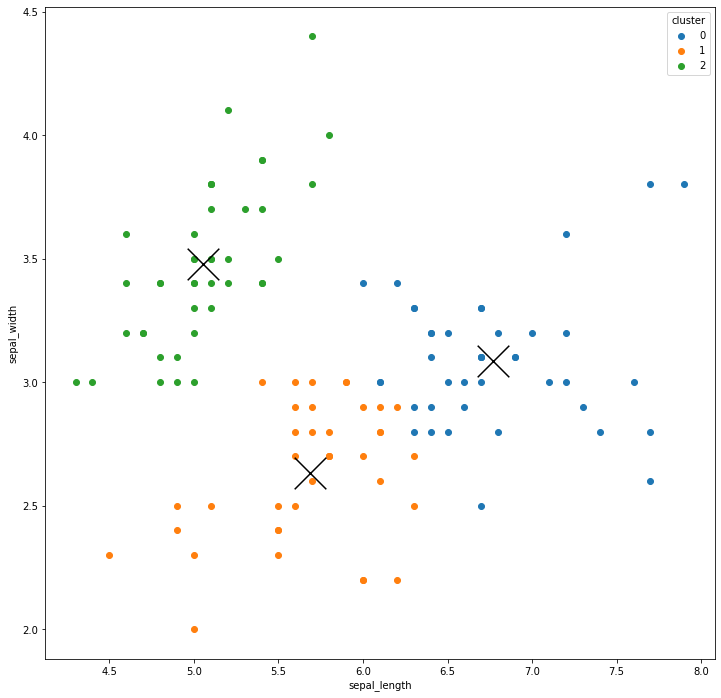

In [13]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.sepal_length, subset.sepal_width, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'sepal width', xlabel = 'sepal length')

train.groupby('clusters').mean().plot.scatter(y = 'sepal_width', x= 'sepal_length', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**Vizualizing the elbow methond of number of k selection**

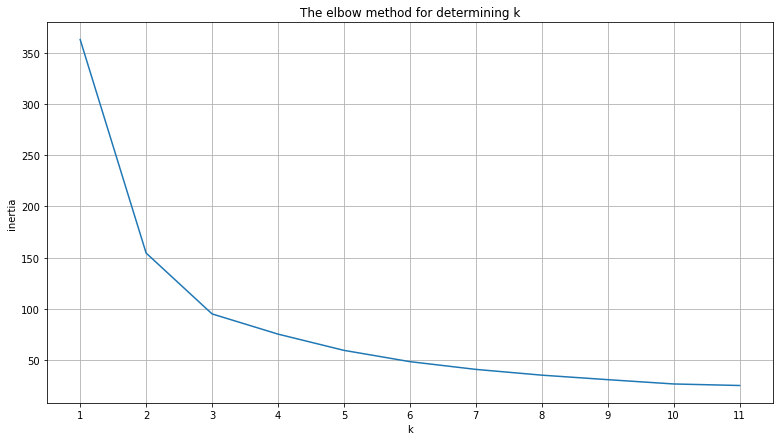

In [14]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

**Clustering with mall data**

In [15]:
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password
import os
import wrangle_mall

In [16]:
df = wrangle_mall.get_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df = wrangle_mall.prep_mall(df)

train, test, validate = wrangle_mall.split_data(df)
train.shape, test.shape, validate.shape

((144, 5), (30, 5), (26, 5))

In [21]:
train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, test, validate, 
                                                                    scaler = MinMaxScaler())

In [23]:
x = train_scaled[['age', 'annual_income']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
pd.DataFrame(kmeans.cluster_centers_ ,columns = x.columns)
train['clusters'] = kmeans.labels_
train



,customer_id,age,annual_income,spending_score,Male,clusters
107,108,54,63,46,1,1
40,41,65,38,35,0,3
167,168,33,86,95,0,2
22,23,46,25,5,0,1
187,188,28,101,68,1,2
...,...,...,...,...,...,...
100,101,23,62,41,0,0
136,137,44,73,7,0,1
16,17,35,21,35,0,0
131,132,39,71,75,1,1


<AxesSubplot:xlabel='age', ylabel='annual_income'>

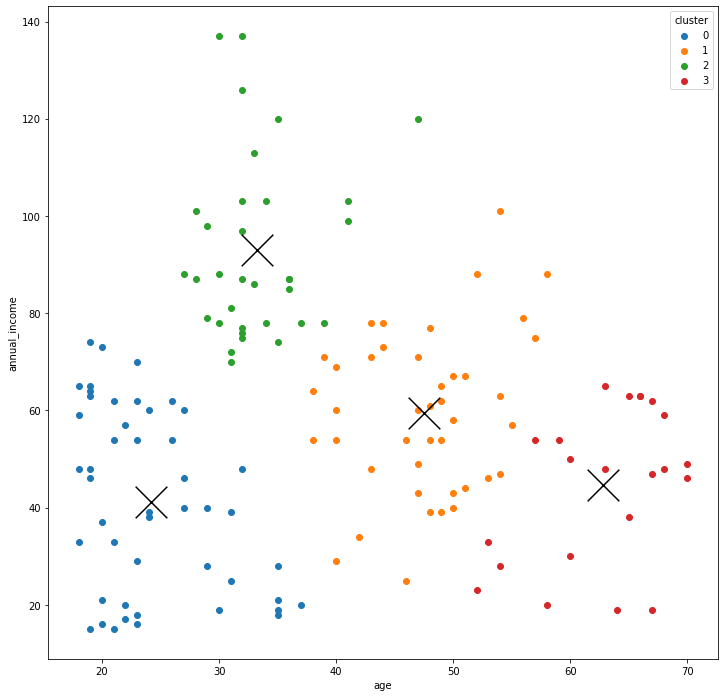

In [32]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.age, subset.annual_income, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'annual income', xlabel = 'age')

train.groupby('clusters').mean().plot.scatter(y = 'annual_income', x= 'age', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**clustering mall data with three features and 3 clusters**

In [35]:
x = train_scaled[['age', 'annual_income', 'spending_score']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
pd.DataFrame(kmeans.cluster_centers_ ,columns = x.columns)
train['clusters'] = kmeans.labels_
train

,customer_id,age,annual_income,spending_score,Male,clusters
107,108,54,63,46,1,1
40,41,65,38,35,0,1
167,168,33,86,95,0,2
22,23,46,25,5,0,1
187,188,28,101,68,1,2
...,...,...,...,...,...,...
100,101,23,62,41,0,0
136,137,44,73,7,0,1
16,17,35,21,35,0,0
131,132,39,71,75,1,2


<AxesSubplot:xlabel='age', ylabel='spending_score'>

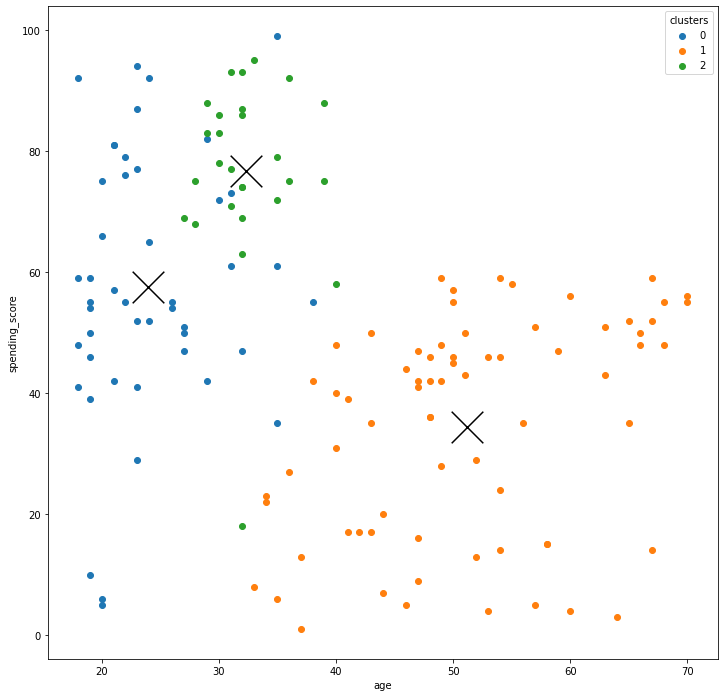

In [53]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.age, subset.spending_score, label = cluster)
ax.legend(title = 'clusters')
ax.set(xlabel = 'age', ylabel = 'spending score')
train.groupby('clusters').mean().plot.scatter(x = 'age', y = 'spending_score', ax = ax, marker = 'x', s = 1000, c = 'black')

**Clustering without scaling**

In [39]:
x = train[['age', 'spending_score']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)
train['unscaled_clusters'] = kmeans.labels_

<AxesSubplot:xlabel='age', ylabel='spending_score'>

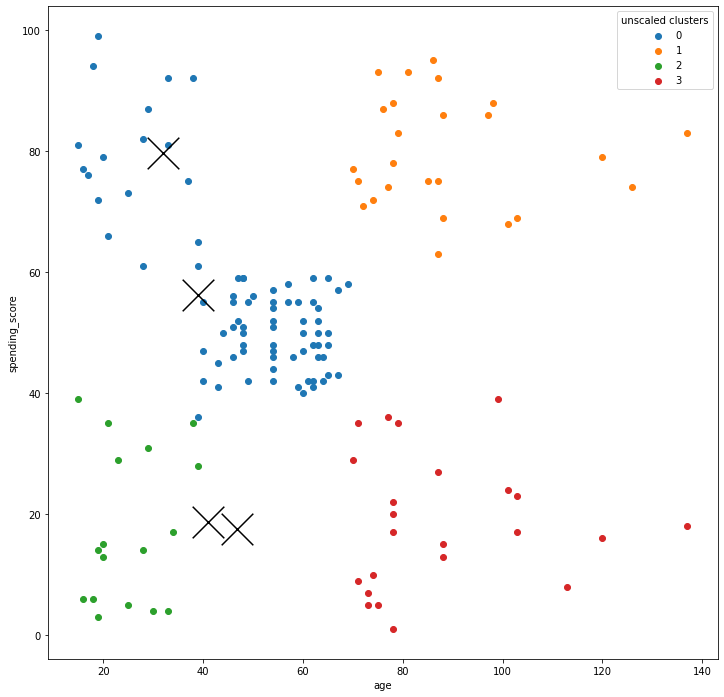

In [49]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('unscaled_clusters'):
    ax.scatter(subset.annual_income, subset.spending_score, label = cluster)
ax.legend(title = 'unscaled clusters')
ax.set(xlabel = 'age', ylabel = 'spending score')
train.groupby('unscaled_clusters').mean().plot.scatter(x = 'age', y = 'spending_score', ax = ax, marker = 'x',
                                                      s = 1000, c = 'black')

In [48]:
train

,customer_id,age,annual_income,spending_score,Male,clusters,unscaled_clusters
107,108,54,63,46,1,1,0
40,41,65,38,35,0,1,2
167,168,33,86,95,0,2,1
22,23,46,25,5,0,1,2
187,188,28,101,68,1,2,1
...,...,...,...,...,...,...,...
100,101,23,62,41,0,0,0
136,137,44,73,7,0,1,3
16,17,35,21,35,0,0,2
131,132,39,71,75,1,2,1


In [55]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.size

2436

In [56]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'bmi', 'children', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [57]:
train_scaled

,age,sex,bmi,children,smoker,region,charges
88,0.476052,0,-0.553493,-0.934821,0,1,-0.475813
137,-1.198697,1,-1.015859,-0.934821,0,1,-0.939982
316,0.755177,1,0.251366,-0.934821,0,1,-0.413060
87,1.173864,0,-0.650834,-0.934821,0,3,-0.239382
80,-0.570666,1,-0.707615,-0.103540,0,0,-0.754071
...,...,...,...,...,...,...,...
326,-0.849791,0,-1.370070,-0.103540,0,2,-0.822313
338,0.755177,1,0.268491,-0.103540,1,0,2.154491
340,-1.059135,0,-0.578730,-0.934821,0,3,0.372324
16,0.894739,0,-0.005504,-0.103540,0,0,-0.260789
